In [0]:
!pip install tensorflow==2.0.0-rc0

     |████████████████████████████████| 86.3MB 69kB/s 
     |████████████████████████████████| 4.3MB 57.9MB/s 
     |████████████████████████████████| 501kB 59.1MB/s 
  Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0


Importing the libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, BatchNormalization, Dense, Flatten

Importing the dataset

In [0]:
dataset_train = pd.read_csv('train.csv')
dataset_test = pd.read_csv('test.csv')

In [20]:
dataset_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
print("No. of training examples: ", dataset_train.shape[0])
print("No. of test examples: ", dataset_test.shape[0])

No. of training examples:  42000
No. of test examples:  28000


In [0]:
X_train = dataset_train.drop(labels = 'label', axis = 1)
Y_train = dataset_train['label']
X_test = dataset_test

In [81]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [82]:
Y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

Changing the shape of data

In [0]:
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

In [84]:
print(X_train.shape)
print(X_test.shape)

(42000, 28, 28, 1)
(28000, 28, 28, 1)


Plotting an example

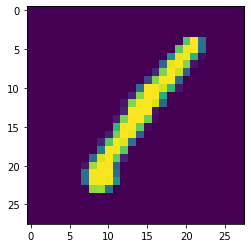

In [92]:
img = X_train[0]
img = img.reshape((28,28))
plt.imshow(img)
plt.show()


In [74]:
Y_train[0]

1

In [0]:
X_train = X_train/np.max(X_train)
X_test = X_test/np.max(X_test)

## CNN Model

Initializing the model

In [0]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
model.add(Dropout(0.5))

model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [115]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 27, 27, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 27, 27, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 26, 26, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 26, 26, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 21632)            

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Training the model

In [117]:
history = model.fit(X_train, Y_train, batch_size=10000, epochs=50)

Epoch 1/50
5/5 [==============================] - 2s 354ms/step - loss: 1.9417 - accuracy: 0.2991
Epoch 2/50
5/5 [==============================] - 2s 356ms/step - loss: 1.0077 - accuracy: 0.6645
Epoch 3/50
5/5 [==============================] - 2s 360ms/step - loss: 0.6495 - accuracy: 0.7907
Epoch 4/50
5/5 [==============================] - 2s 361ms/step - loss: 0.5023 - accuracy: 0.8425
Epoch 5/50
5/5 [==============================] - 2s 363ms/step - loss: 0.4017 - accuracy: 0.8765
Epoch 6/50
5/5 [==============================] - 2s 365ms/step - loss: 0.3375 - accuracy: 0.8989
Epoch 7/50
5/5 [==============================] - 2s 367ms/step - loss: 0.2861 - accuracy: 0.9124
Epoch 8/50
5/5 [==============================] - 2s 365ms/step - loss: 0.2478 - accuracy: 0.9242
Epoch 9/50
5/5 [==============================] - 2s 362ms/step - loss: 0.2135 - accuracy: 0.9356
Epoch 10/50
5/5 [==============================] - 2s 359ms/step - loss: 0.1922 - accuracy: 0.9422
Epoch 11/50
5/5 [==

Plotting accuracy versus no. of epochs

Text(0, 0.5, 'Accuracy')

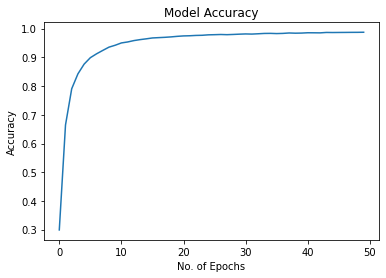

In [118]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')

Plotting loss versus no, of epochs

Text(0, 0.5, 'Loss')

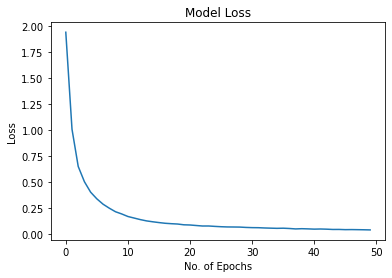

In [119]:
plt.figure()
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')

In [0]:
Y_pred = model.predict_classes(X_test)

Downloading the result as csv file

In [0]:
res = pd.DataFrame(Y_pred)
res.columns = ["Label"]
res.to_csv("sub_CNN1.csv")